### Curso de imágenes - Especialidad I (2018) - FAMAF-UNC

# Trabajo práctico Nº 1

**Profesor:** P. Pérez

Los ejercicios comprenden la primera mitad del **Capítulo II** del curso, correspondiente a la manipulación y procesamiento de imágenes digitales. 

Los trabajos deben ser entregados en **formato PDF** especificando código de programación utilizado, funciones implementadas y resultados obtenidos, o en una **Notebook de Jupyter** subida al repositorio de **Github** y *corrida* para que al corregir no sea necesario correr código. 

Se aceptarán trabajos realizados en plataformas Matlab y Python.

## Ejercicio 1

**Implementar un algoritmo basado en el método de umbralamiento para detección de bordes externos (contornos) en una imagen médica 2D de su elección.**

Elegimos la imágen de la mano de Röntgen y la pasamos a escala de grises para poder trabajar sobre ella en una sola banda, utilizando la librería `PIL`.

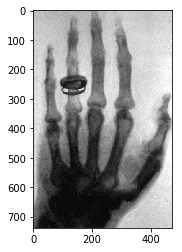

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('img/x-ray-rontgen.jpg').convert('L') # modo 'L' es el modo de escala de grises

plt.imshow(img)
plt.show()

Transformamos la imagen en matriz utilizando la librería `numpy`.

In [2]:
import numpy as np
img2 = np.array(img)
img2.shape # nos dará la dimensión de la imagen.

(738, 471)

Observando los últimos dos resultados podemos ver que la imagen 2D se puede representar por una matriz 738x471.

El método de umbralamiento consiste en generar una imagen binaria donde se distinguen los píxeles de interés (objeto) del fondo. Para realizar el umbralamiento, se analizan los valores de intensidad de los píxeles. Aquellos que superen un valor de umbral preestablecido son detectados. Formalmente puede escribirse como 

$$
g(x,y) = \lbrace
 \begin{array}{lcc}
             1 &   si  & f(x,y) \leq u \\
             2 &   si  & f(x,y) \gt  u
 \end{array}
$$  

donde $f(x, y)$ es la función que describe la imagen original, y $g(x, y)$ es la imagen binaria generada a partir del umbral $u$, que es un valor de intensidad del péxel a definir por el usuario en función de sus intereses.

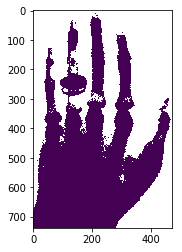

In [3]:
# implementamos el algoritmo
def umbralamiento(img2, i, j, u):
    if img2[i][j] <= u:
        return 1

u = img2.mean() # pongo la media como un valor arbitrario de umbralamiento

gxy = np.zeros(img2.shape)
for i in range(img2.shape[0]): # va de 0 a 737
    for j in range(img2.shape[1]): # va de 0 a 470
        gxy[i][j] = umbralamiento(img2,i,j,u)

plt.imshow(gxy)
plt.show()

## Ejercicio 2

**Calcular y graficar el histograma de una imagen médica 2D de 1 banda.**

Hay varias formas de graficar el histograma. `pillow` (que es otra forma de nombrar a `PIL`) provee funciones directas para hacerlo. La otra es contar pixel a pixel los valores.

Usamos la imagen original en escala de grises `img`.

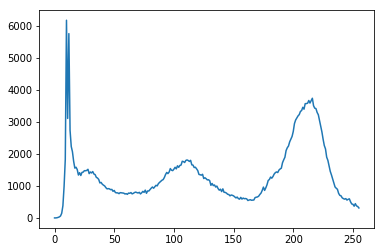

In [4]:
plt.plot(img.histogram())
plt.show()

Esto muestra claramente que se trata de una imagen de 8 bits, entre otras cosas.

## Ejercicio 3

**Definir y aplicar un algoritmo de modificación de contraste a una imagen médica 2D de 1 banda.**

Para la modificación de contraste, el algoritmo a utilizar viene dado por la ecuación

$$
g(x, y) = \left( f(x, y) − 2^{N−1} \right) tan(\varphi) + 2^{N−1}
$$

donde $g(x, y)$ es la imagen *output*, $f(x,y)$ es la imagen *input*, $N$ es el exponente correspondiente al número de bits de la imagen.

In [5]:
N = 8                 # número de bits
angulos = [30, 45, 60]
phi = [angulos[0]*np.pi/180, angulos[1]*np.pi/180, angulos[2]*np.pi/180]   # damos tres valores para poder comparar

def contraste(img2,i,j,k):
    return float(float(img2[i,j]) - float(2**(N-1)))*float(np.tan(phi[k]))

cont1 = np.zeros(img2.shape) # lo tengo que hacer con img2 que está convertida en array
cont2 = np.zeros(img2.shape)
cont3 = np.zeros(img2.shape)

for i in range(img2.shape[0]): # va de 0 a 737
    for j in range(img2.shape[1]): # va de 0 a 470
        cont1[i,j] = contraste(img2,i,j,0)
        cont2[i,j] = contraste(img2,i,j,1)
        cont3[i,j] = contraste(img2,i,j,2)

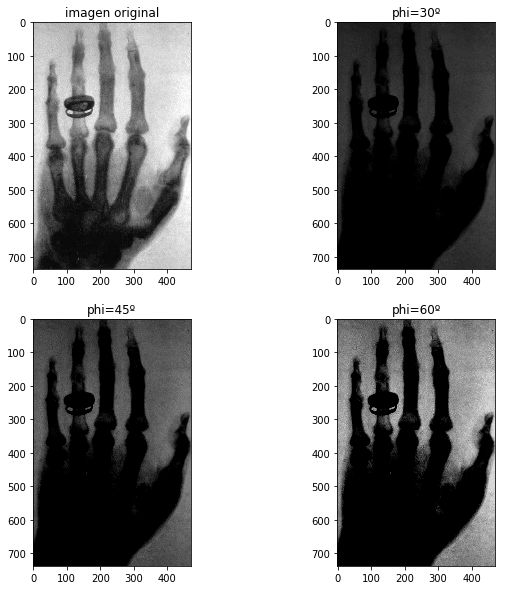

In [6]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.imshow(np.squeeze(img2), cmap='gray', vmin=0, vmax=255)
ax2.imshow(np.squeeze(cont1), cmap='gray', vmin=0, vmax=255)
ax3.imshow(np.squeeze(cont2), cmap='gray', vmin=0, vmax=255)
ax4.imshow(np.squeeze(cont3), cmap='gray', vmin=0, vmax=255)

ax1.set_title(u'imagen original')
ax2.set_title('phi={}º'.format(angulos[0]))
ax3.set_title(u'phi={}º'.format(angulos[1]))
ax4.set_title(u'phi={}º'.format(angulos[2]))

plt.show()

## Ejercicio 4

**Definir y aplicar un algoritmo de modificación de color a una imagen médica 2D de 1 banda. Estudiar el efecto del parámetro $\gamma$.**

La corrección $\gamma$ es una técnica sencilla de modificación de colores en una imagen. En la cual el algoritmo de transformación se obtiene de la ecuación

$$
g(x,y) = (2^N -1) \left( \frac{f(x,y)}{(2^N -1)} \right)^{1/\gamma}
$$

In [7]:
gamma = [0.5, 1, 2]

gama1 = np.zeros(img2.shape)
gama2 = np.zeros(img2.shape)
gama3 = np.zeros(img2.shape)

a = 2**N - 1
def color_gamma(img, i, j, k, a):
    b = float(img2[i,j]/a)
    c = 1./float(gamma[k])
    return b**c

for i in range(img2.shape[0]): # va de 0 a 737
    for j in range(img2.shape[1]): # va de 0 a 470
        gama1[i,j] = color_gamma(img2,i,j,0,a)
        gama2[i,j] = color_gamma(img2,i,j,1,a)
        gama3[i,j] = color_gamma(img2,i,j,2,a)

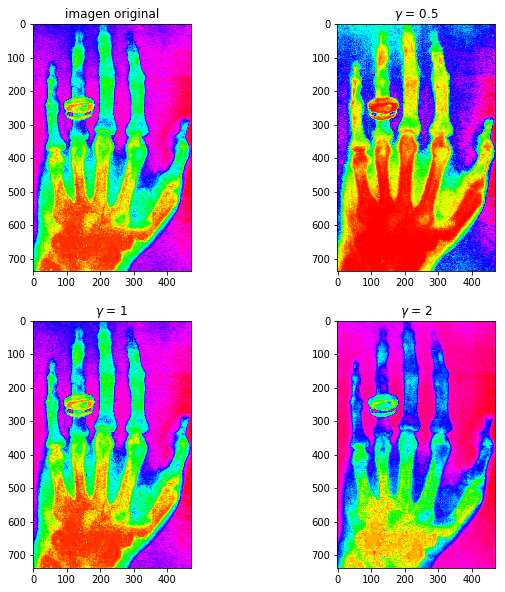

In [8]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

ax1.imshow(np.squeeze(img2), cmap='hsv')
ax2.imshow(np.squeeze(gama1), cmap='hsv')
ax3.imshow(np.squeeze(gama2), cmap='hsv')
ax4.imshow(np.squeeze(gama3), cmap='hsv')

ax1.set_title(u'imagen original')
ax2.set_title(r'$\gamma$ = {}'.format(gamma[0]))
ax3.set_title(r'$\gamma$ = {}'.format(gamma[1]))
ax4.set_title(r'$\gamma$ = {}'.format(gamma[2]))

plt.show()